# Example - Apple Inc. stock prices

### Introduction

The file `aapl.csv` contains data on the Apple Inc. stock prices in the Nasdaq stock market, for the year 2019, as published by Yahoo Finance (`finance.yahoo.com/quote/AAPL/history?p=AAPL`). The data come in the typical OHLC format (Open/High/Low/Close).

### The data set

The data set covers 251 trading days. The variables are:

* `date`, the date, as yyyy-mm-dd.

* `open`, the price (US dollars) of the stock at the beginning of the trading day. It can be different from the closing price of the previous trading day.

* `high`, the highest price (US dollars) of the stock on that trading day.

* `low`, the lowest price (US dollars) of the stock on that day.

* `close`, the price (US dollars) of the stock at closing time.

* `adj_close`, the closing price adjusted for factors in corporate actions, such as stock splits, dividends, and rights offerings.

* `volume`, the amount of Apple stock that has been traded on that day.

### Importing the data

I import Pandas in the usual way:

In [1]:
import pandas as pd

Data from a CSV file are imported to a Pandas data frame with the function `read_csv`. The data frame name is chosen by the user, and the file name has to contain the path of that file (either local or remote). I use here a remote path, which implies that the data are extracted from a located in an file located in a server accessed through Internet, in this case in a GitHub public repository.

In [2]:
url = 'https://raw.githubusercontent.com/mcanela-iese/DataScience/main/Data/aapl.csv'
df = pd.read_csv(url, index_col=0)

The argument `index_col=0` specifies the column that we wish to use as the index, which, in this case, is the first one (Python starts counting by 0), that is, `date`. If we omit this specification, all the columns are incorporated as columns of the data frame, and a range index is created automatically. By default, the first row of the CSV file is read as the column names.

With `shape`, we can check the number of rows and the number of columns:

In [3]:
df.shape

(251, 6)

This is correct, 251 rows and 6 columns. The first row (column names) and the first column (index) of the CSV file are not counted. The index and the column names can be extracted as:

In [4]:
df.index

Index(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15',
       ...
       '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
       '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30'],
      dtype='object', name='date', length=251)

In [5]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

The methods `head` and `tail` extract the first and the last rows of a data frame, respectively. The default number of rows extracted is 5, but you may pass a custom number. Note that the index appears on the left. In this case, the index picks its name from the first row of the CSV file, but range indexes created automatically do not have a name. The index name is rarely used (at least in this course). 

In [6]:
df.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.516388,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.125412,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.064575,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,144.741714,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.500916,41025300


In [7]:
df.tail()

,open,high,low,close,adj_close,volume
date,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


Note that `shape`, `index` and `columns` are pure attributes, which do not take arguments. But `head` and `tail` can take an argument (the number of rows to be extracted), so they carry a parenthesis. An empty parenthesis means that the default arguments are accepted.

The contents of a data frame can be explored with the method `info`. It returns a report containing the number of rows, the number of columns, and the name, the data type and the number of non-missing values of every column of the data frame.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2019-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       251 non-null    float64
 1   high       251 non-null    float64
 2   low        251 non-null    float64
 3   close      251 non-null    float64
 4   adj_close  251 non-null    float64
 5   volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


We can get a statistical summary with `describe`:

In [9]:
df.describe()

,open,high,low,close,adj_close,volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,207.542151,209.497650,205.939960,207.915737,205.255342,2.804224e+07
std,34.047409,34.143414,33.967037,34.182276,34.592784,1.084423e+07
min,143.979996,145.720001,142.000000,142.190002,139.125412,1.136200e+07
25%,185.035004,187.665001,183.295006,185.919998,183.044487,2.095990e+07
50%,203.119995,204.490005,201.559998,202.899994,200.321732,2.588170e+07
75%,222.534997,224.169999,220.579994,223.339996,221.145821,3.202875e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,9.131220e+07


### The price trend

Analysts typically explore **price trends** in stock prices. Let us do that with the opening price. The corresponding column is extracted as:

In [10]:
df['open']

date
2019-01-02    154.889999
2019-01-03    143.979996
2019-01-04    144.529999
2019-01-07    148.699997
2019-01-08    149.559998
                 ...    
2019-12-23    280.529999
2019-12-24    284.690002
2019-12-26    284.820007
2019-12-27    291.119995
2019-12-30    289.459991
Name: open, Length: 251, dtype: float64

Note that `df['open']` is a series, but `df[['open']]` would have been a data frame with one column, which is not the same thing.

In this case, the time trend is easily detected in a **line plot**, which can be obtained with the method `plot`:  

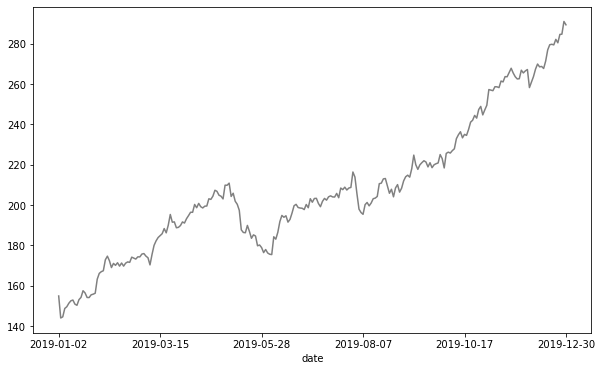

In [11]:
df['open'].plot(figsize=(10,6), color='gray');

The use of plotting functions in this course is restricted to some simple Pandas methods. Neverthteless, I have played here with the size and the color to improve the presentation. If you don't like them, you can change them easily. The defaults are `figsize=(4,4)` and `color='blue'`. 

The index values are taken for the horizontal axis. The name of the index, when there is one, is shown below the axis. Note that, here, the index values are not recognized as dates, but taken as strings. The semicolon in the last line stops the Python output showing up. That output would not say much to you.

### Daily returns

The **daily return** is the percentage change in the price with respect to the preceding trading day. Pandas provides the function `pct_change`, which does the job. Note that it returns a proportion, multiplied here by 100 to put it in percentage scale. 

In [12]:
df['return'] = 100*df['open'].pct_change()

I have added the returns as an additional column to the data farme `df`. You can also keep them as a separate series, by writing the name of that series on the left side of the preceding definition. 

Note that, since the first day has no return, the new column starts with a **missing value**, which in Pandas is denoted by `NaN`.

In [13]:
df.head()

,open,high,low,close,adj_close,volume,return
date,,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.516388,37039700,NaN
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.125412,91312200,-7.043710
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.064575,58607100,0.382000
2019-01-07,148.699997,148.830002,145.899994,147.929993,144.741714,54777800,2.885213
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.500916,41025300,0.578346


*Note*. `pct_change` is based on the order in the data comes, not on the dates themselves. This is not a problem in this case, since the data come sorted by date.

A line plot can be obtained as for the price:

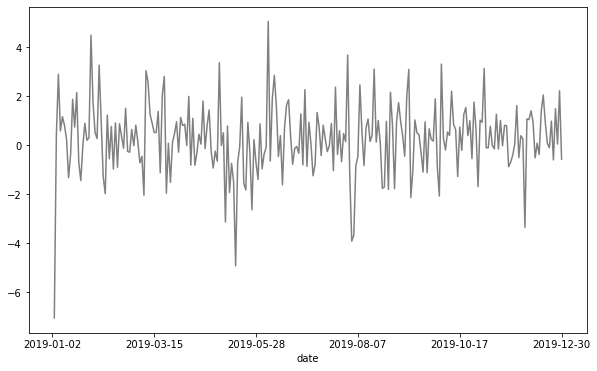

In [14]:
df['return'].plot(figsize=(10,6), color='gray');

No clear trend is observed here. The daily returns look quite **stationary**. It may make sense to look at the distribution of the returns, as if they were extracted from a "population". The **histogram** is a quick and dirty graphical tool for this job. 

Pandas method `plot.hist` returns a histogram. The argument `rwidth` sets the percentage of the space between consecutive bin centers that is taken by the histogram bars. It is used here to separate the bars, which enhances the visual impact (you may disagree).

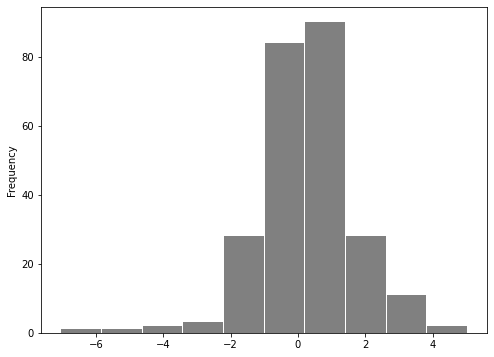

In [15]:
df['return'].plot.hist(figsize=(8,6), color='gray', rwidth=0.98);

The distribution is not far from bell-shaped, but the tails are longer than in a normal distribution. This pattern, which statisticians call **kurtosis**, is typical of financial returns.

### Trading volume

As a second example, and to get some contrast, I look at the distribution of the trading volume. The histogram is obtained in the same way as for the returns:

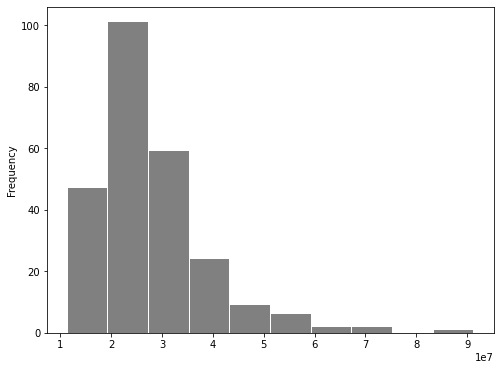

In [16]:
df['volume'].plot.hist(figsize=(8,6), color='gray', rwidth=0.98);

Now, this is a **skewed distribution**. This type of distribution is typical of variables which represent amounts of money.

###  Association between daily returns and trading volume

Finally, I explore the association between the daily returns and the trading volume. Coincide high or low returns with big or small trading volumes? A **scatter plot** may provide some insight on this. The plot can be obtained in Pandas with the method `plot.scatter`. Note that I specify here the *x* and *y* axes.  

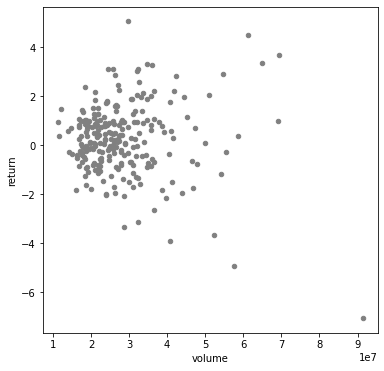

In [17]:
df.plot.scatter(x='volume', y='return', figsize=(6,6), color='gray');

A linear association can be dismissed at first sight. This is consistent with the low **correlation**, as we see next. Correlations are obtained in Pandas with the method `corr`, which works both for the correlation of two columns of a data frame and for the **correlation matrix** of a list of columns. 

In [18]:
df['volume'].corr(df['return'])

-0.05886489278002881

This will look friendlier with a bit of rounding:

In [19]:
df['volume'].corr(df['return']).round(3)

-0.059

Nevertheless, extreme returns seem to coincide with big trading volumes, which makes sense, since volatility fosters trading. If we replace the returns by their absolute value, the correlation gets relevance. The absolute values are calculated in Pandas with the function `abs`.

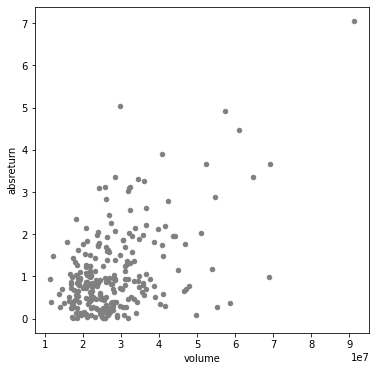

In [20]:
df['absreturn'] = df['return'].abs()
df.plot.scatter(x='volume', y='absreturn', figsize=(6,6), color='gray');

In [21]:
df['volume'].corr(df['absreturn']).round(3)

0.495

### Homework

A direct measure of volatility can be obtained as the difference of the highest price minus the lowest price in a given trading day. This is called the **daily price variation**. 

* Do you see a trend in the daily price variation for the Apple stock prices?

* How is the distribution?

* Is it correlated to the trading volume?